In [2]:
#importing Libraries for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset.
data = pd.read_csv('C:/Users/H.H ENTERPRISES/Desktop/orbits.csv')

In [4]:
#Checking the no of Rows & Columns for the dataset
data.shape

(15635, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Object Classification                     15635 non-null  object 
 2   Epoch (TDB)                               15635 non-null  int64  
 3   Orbit Axis (AU)                           15635 non-null  float64
 4   Orbit Eccentricity                        15635 non-null  float64
 5   Orbit Inclination (deg)                   15635 non-null  float64
 6   Perihelion Argument (deg)                 15635 non-null  float64
 7   Node Longitude (deg)                      15635 non-null  float64
 8   Mean Anomoly (deg)                        15635 non-null  float64
 9   Perihelion Distance (AU)                  15635 non-null  float64
 10  Aphelion Distance (AU)            

In [12]:
#Displaying the contents of the datasets
data.head

<bound method NDFrame.head of         Object Name     Object Classification  Epoch (TDB)  Orbit Axis (AU)  \
0          433 Eros             Amor Asteroid        57800           1.4579   
1        719 Albert             Amor Asteroid        57800           2.6385   
2        887 Alinda             Amor Asteroid        57800           2.4787   
3      1036 Ganymed             Amor Asteroid        57800           2.6628   
4         1221 Amor             Amor Asteroid        57800           1.9191   
...             ...                       ...          ...              ...   
15630    (2017 CX1)           Apollo Asteroid        57800           1.4096   
15631    (2017 CO5)             Amor Asteroid        57789           2.2612   
15632    (2017 CP5)             Amor Asteroid        57800           1.5131   
15633    (2017 CR5)           Apollo Asteroid        57793           1.8815   
15634    (6344 P-L)  Apollo Asteroid (Hazard)        57800           2.8043   

       Orbit Eccentri

In [10]:
#Count missing values in each column
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Object Name
Object Name
False    15635
Name: count, dtype: int64

Object Classification
Object Classification
False    15635
Name: count, dtype: int64

Epoch (TDB)
Epoch (TDB)
False    15635
Name: count, dtype: int64

Orbit Axis (AU)
Orbit Axis (AU)
False    15635
Name: count, dtype: int64

Orbit Eccentricity
Orbit Eccentricity
False    15635
Name: count, dtype: int64

Orbit Inclination (deg)
Orbit Inclination (deg)
False    15635
Name: count, dtype: int64

Perihelion Argument (deg)
Perihelion Argument (deg)
False    15635
Name: count, dtype: int64

Node Longitude (deg)
Node Longitude (deg)
False    15635
Name: count, dtype: int64

Mean Anomoly (deg)
Mean Anomoly (deg)
False    15635
Name: count, dtype: int64

Perihelion Distance (AU)
Perihelion Distance (AU)
False    15635
Name: count, dtype: int64

Aphelion Distance (AU)
Aphelion Distance (AU)
False    15635
Name: count, dtype: int64

Orbital Period (yr)
Orbital Period (yr)
False    15635
Name: count, dtype: int64

Minimum Orbit Inte

In [11]:
##Find the total number of missing values from the entire dataset
data.isnull().sum().sum()

1

In [13]:
# Drop rows with missing values in the "Asteroid Magnitude" column
data.dropna(subset=['Asteroid Magnitude'], inplace=True)

In [14]:
##Find the total number of missing values from the entire dataset
data.isnull().sum().sum()

0

In [15]:
# Selecting relevant numeric features for visualization
numeric_features = [
    'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)',
    'Perihelion Argument (deg)', 'Node Longitude (deg)',
    'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
    'Aphelion Distance (AU)', 'Orbital Period (yr)',
    'Minimum Orbit Intersection Distance (AU)', 'Asteroid Magnitude'
]

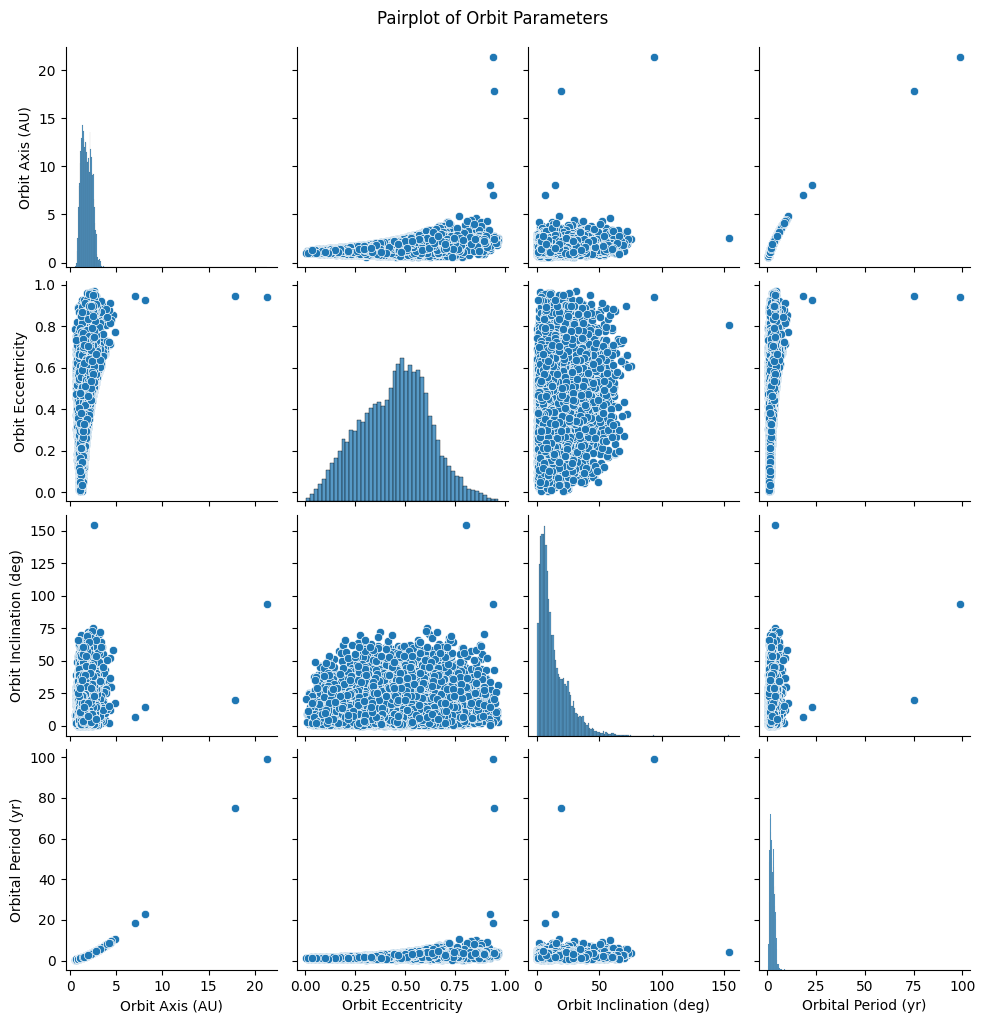

In [16]:
# Creating a pairplot to visualize relationships between numeric variables
sns.pairplot(data[['Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)', 'Orbital Period (yr)']])
plt.suptitle("Pairplot of Orbit Parameters", y=1.02)
plt.show()

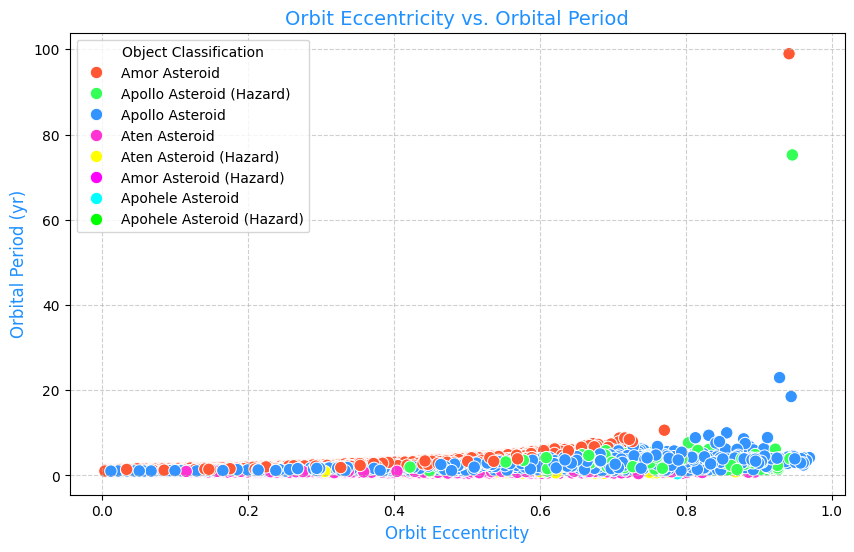

In [17]:
# # Creating a scatter plot of 'Orbit Eccentricity' vs. 'Orbital Period (yr)'
custom_palette = ['#FF5733', '#33FF57', '#3393FF', '#FF33D4', '#FFFF00', '#FF00FF', '#00FFFF', '#00FF00']

# Create a scatter plot with the updated palette
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Orbit Eccentricity', y='Orbital Period (yr)', data=data, hue='Object Classification', palette=custom_palette, s=80)
# ... rest of the code remains the same
plt.xlabel('Orbit Eccentricity', fontsize=12, color='dodgerblue')
plt.ylabel('Orbital Period (yr)', fontsize=12, color='dodgerblue')
plt.title('Orbit Eccentricity vs. Orbital Period', fontsize=14, color='dodgerblue')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot with a legend
plt.legend(title='Object Classification', loc='best', title_fontsize=10)

plt.show()

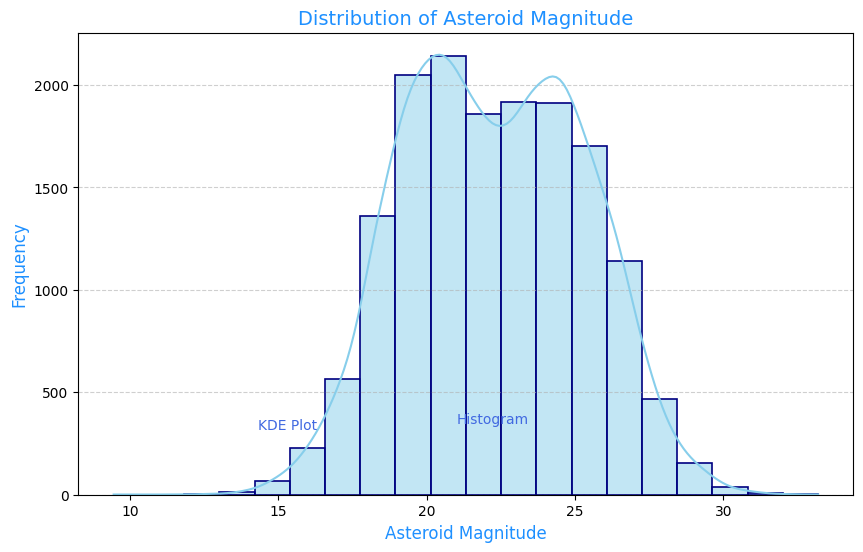

In [18]:
# # Creating a histogram of 'Asteroid Magnitude'
sns.set_palette('Set1')

# Create a histogram of 'Asteroid Magnitude' with added features
plt.figure(figsize=(10, 6))
sns.histplot(data['Asteroid Magnitude'], bins=20, kde=True, color='skyblue', edgecolor='navy', linewidth=1.2)
plt.xlabel('Asteroid Magnitude', fontsize=12, color='dodgerblue')
plt.ylabel('Frequency', fontsize=12, color='dodgerblue')
plt.title('Distribution of Asteroid Magnitude', fontsize=14, color='dodgerblue')

# Customize the grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding some text annotation
plt.text(14.3, 320, 'KDE Plot', fontsize=10, color='royalblue')
plt.text(21, 350, 'Histogram', fontsize=10, color='royalblue')

# Show the plot
plt.show()

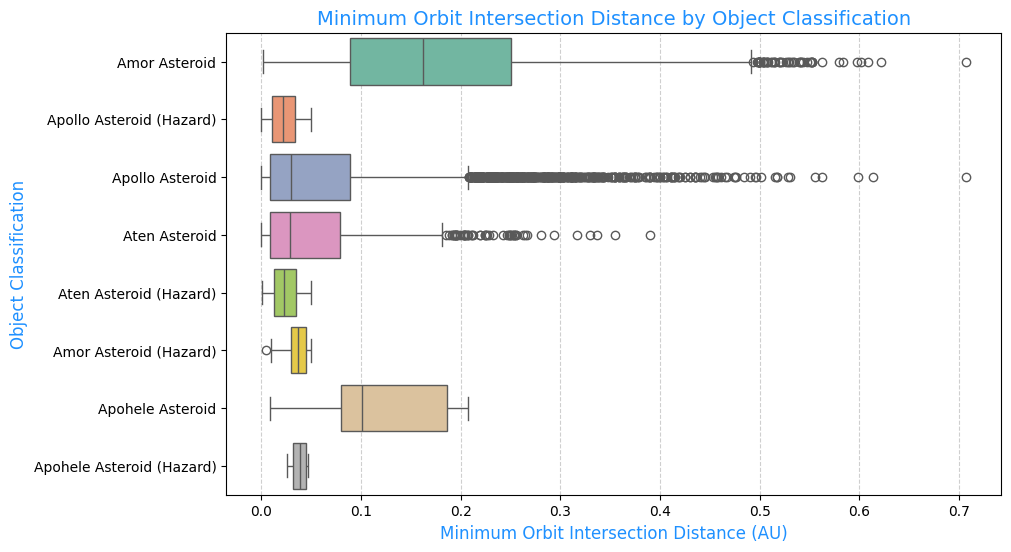

In [19]:
# # Creating a box & whisker plot of 'Minimum Orbit Intersection Distance (AU)'
sns.set_palette('Set2')

# Create a box plot of 'Minimum Orbit Intersection Distance (AU)' with added features
plt.figure(figsize=(10, 6))
sns.boxplot(x='Minimum Orbit Intersection Distance (AU)', y='Object Classification', data=data, orient='h', palette='Set2', hue='Object Classification', dodge=False, legend=False)
plt.ylabel('Object Classification', fontsize=12, color='dodgerblue')
plt.xlabel('Minimum Orbit Intersection Distance (AU)', fontsize=12, color='dodgerblue')
plt.title('Minimum Orbit Intersection Distance by Object Classification', fontsize=14, color='dodgerblue')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Define features (X) and target variable (y)
X = data.drop(['Object Name', 'Object Classification', 'Asteroid Magnitude'], axis=1)
y = data['Asteroid Magnitude']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)


In [25]:
# Decision Tree Regression
tree_reg_model = DecisionTreeRegressor()
tree_reg_model.fit(X_train, y_train)
tree_reg_predictions = tree_reg_model.predict(X_test)

# Random Forest Regression
forest_reg_model = RandomForestRegressor()
forest_reg_model.fit(X_train, y_train)
forest_reg_predictions = forest_reg_model.predict(X_test)

# Gradient Boosting Regression
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)


In [26]:
# Evaluate the models
def evaluate_model(predictions, actual):
    mse = mean_squared_error(actual, predictions)
    r2 = r2_score(actual, predictions)
    return mse, r2


In [27]:
linear_reg_metrics = evaluate_model(linear_reg_predictions, y_test)
tree_reg_metrics = evaluate_model(tree_reg_predictions, y_test)
forest_reg_metrics = evaluate_model(forest_reg_predictions, y_test)
gradient_boosting_metrics = evaluate_model(gradient_boosting_predictions, y_test)

# Display

In [28]:
# Display the evaluation metrics
print("Linear Regression Metrics:")
print("Mean Squared Error:", linear_reg_metrics[0])
print("R^2 Score:", linear_reg_metrics[1])
print("\n")

Linear Regression Metrics:
Mean Squared Error: 3.64490088854882
R^2 Score: 0.5946281959443642




In [29]:
print("Decision Tree Regression Metrics:")
print("Mean Squared Error:", tree_reg_metrics[0])
print("R^2 Score:", tree_reg_metrics[1])
print("\n")

print("Random Forest Regression Metrics:")
print("Mean Squared Error:", forest_reg_metrics[0])
print("R^2 Score:", forest_reg_metrics[1])
print("\n")

print("Gradient Boosting Regression Metrics:")
print("Mean Squared Error:", gradient_boosting_metrics[0])
print("R^2 Score:", gradient_boosting_metrics[1])

Decision Tree Regression Metrics:
Mean Squared Error: 3.1871661016949155
R^2 Score: 0.645535691648552


Random Forest Regression Metrics:
Mean Squared Error: 1.5134293086856416
R^2 Score: 0.8316822355581714


Gradient Boosting Regression Metrics:
Mean Squared Error: 1.5346375653791298
R^2 Score: 0.8293235351326744


In [ ]:
#Conclusion: Smaller MSE values indicate better model performance. In this case, Random Forest and Gradient Boosting have lower MSE, suggesting better predictive accuracy compared to Decision Tree and Linear Regression.
# Conclusion: Higher R^2 values suggest a better fit of the model to the data. Random Forest and Gradient Boosting have higher R^2, indicating a better overall fit compared to Decision Tree and Linear Regression.
